## 1) Establish Stock Universe of tickers
## 2) Fetch and Store data
## 3) Screen

In [3]:
"""

Make Three Microservices:
1) Data Fetcher/Scraper/Aggregator/Manager to store/retrieve/update
    --> golang mdgw to fetch from db if data exists, else query external_mdgw (python) for data & persist in db

2) Screener --> Strategy(Indicators)/Alerter Deployment Infrastructure
    --> Screener = c++
    --> Strategy = python

3) Aggregate Dashboard GUI & Live Graphing Application
    --> Python / JS
"""

from stockalyzer.data.data_manager import *
from stockalyzer.data.data_fetcher import TDDataFetcher, YFDataFetcher
from stockalyzer.strategy.ema_crossover import EMACrossoverStrategy
from stockalyzer.strategy.rsi_ema import RSIEMAStrategy
from stockalyzer.model.stock import Stock

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('mode.chained_assignment', 'raise')

In [4]:
tickers = ['AAPL','AMZN']
start_time = datetime(2019, 6, 1)
debug = False

# Configure upstream data fetcher
# Yahoo finance
fetcher_yf = YFDataFetcher(tickers)

# TD Ameritrade
fetcher_td = TDDataFetcher(tickers)

# Initialize a StockDataManager to fetch data 
sm_td = StockDataManager.load_from_data_fetcher(fetcher_td, start_time, interval='1d',debug=debug)
sm_yf = StockDataManager.load_from_data_fetcher(fetcher_yf, start_time, interval='1d',debug=debug)

print("We can get the data for one specific ticker from the stock manager")
display(sm_td._data['AAPL'].head())

print("Or we can just get the all of the data the stock manager fetched")
display(sm_td._data)

/Users/jfeibs/Desktop/stockalyzer/stockalyzer/scripts/config/config.ini
[*********************100%***********************]  2 of 2 completed


DatetimeIndex(['2019-06-03', '2019-06-04', '2019-06-05', '2019-06-06',
               '2019-06-07', '2019-06-10', '2019-06-11', '2019-06-12',
               '2019-06-13', '2019-06-14',
               ...
               '2022-04-25', '2022-04-26', '2022-04-27', '2022-04-28',
               '2022-04-29', '2022-05-02', '2022-05-03', '2022-05-04',
               '2022-05-05', '2022-05-06'],
              dtype='datetime64[ns]', name='Date', length=740, freq=None)

We can get the data for one specific ticker from the stock manager


,High,Low,Open,Close,Volume
Date,,,,,
2019-06-03,1766.2900,1672.0000,1760.01,1692.69,9098708
2019-06-04,1730.8200,1680.8900,1699.24,1729.56,5679121
2019-06-05,1752.0000,1715.2514,1749.60,1738.50,4239782
2019-06-06,1760.0000,1726.1300,1737.71,1754.36,3689272
2019-06-07,1806.2538,1759.4900,1763.70,1804.03,4808246


Or we can just get the all of the data the stock manager fetched


AAPL                                                 AMZN  \
                 High        Low       Open    Close    Volume        High   
Date                                                                         
2019-06-03  1766.2900  1672.0000  1760.0100  1692.69   9098708   44.480000   
2019-06-04  1730.8200  1680.8900  1699.2400  1729.56   5679121   44.957500   
2019-06-05  1752.0000  1715.2514  1749.6000  1738.50   4239782   46.247500   
2019-06-06  1760.0000  1726.1300  1737.7100  1754.36   3689272   46.367500   
2019-06-07  1806.2538  1759.4900  1763.7000  1804.03   4808246   47.980000   
2019-06-10  1884.8700  1818.0000  1822.0000  1860.63   5371007   48.842500   
2019-06-11  1893.7000  1858.0000  1883.2500  1863.70   4042694   49.000000   
2019-06-12  1865.0000  1844.3800  1853.9800  1855.32   2678335   48.992500   
2019-06-13  1883.0900  1862.2200  1866.7200  1870.30   2795810   49.197500   
2019-06-14  1876.0000  1859.0000  1864.0000  1869.67   2851163   48.396575   
2019-06-17  1895.6880  1875.4500  1876.5000  1886.03   2634342   48.740000   
2019-06-18  1921.6700  1899.7900  1901.3500  1901.37   3895728   50.072500   
2019-06-19  1919.5807  1892.4700  1907.8400  1908.79   2895347   49.970000   
2019-06-20  1935.2000  1905.8000  1933.3300  1918.19   3217153   50.152500   
2019-06-21  1925.9500  1907.5800  1916.1000  1911.30   3933576   50.212500   
2019-06-24  1916.8600  1901.3000  1912.6600  1913.90   2282969   50.040000   
2019-06-25  1916.3850  1872.4200  1911.8400  1878.27   3012347   49.815000   
2019-06-26  1903.8000  1887.3200  1892.4800  1897.83   2441910   50.247500   
2019-06-27  1911.2400  1898.0400  1902.0000  1904.28   2141721   50.392500   
2019-06-28  1912.9400  1884.0000  1909.1000  1893.63   3037358   49.873750   
2019-07-01  1929.8200  1914.6600  1922.9800  1922.19   3203347   51.122500   
2019-07-02  1934.7900  1906.6300  1919.3800  1934.31   2651299   50.783075   
2019-07-03  1941.5900  1930.5000  1935.8900  1939.00   1690294   51.110000   
2019-07-05  1945.9000  1925.3000  1928.6000  1942.91   2628359   51.270000   
2019-07-08  1956.0000  1928.2532  1934.1200  1952.32   2883371   50.350000   
2019-07-09  1990.0100  1943.4750  1947.8000  1988.30   4345698   50.377500   
2019-07-10  2024.9400  1995.4000  1996.5100  2017.41   4931902   50.932500   
2019-07-11  2035.8000  1995.3000  2025.6200  2001.07   4317766   51.097500   
2019-07-12  2017.0000  2003.8700  2008.2700  2011.00   2509297   51.000000   
2019-07-15  2022.9000  2001.5500  2021.4000  2020.99   2981343   51.467500   
2019-07-16  2026.3196  2001.2200  2010.5800  2009.90   2618198   51.527500   
2019-07-17  2012.0000  1992.0300  2007.0500  1992.03   2558809   51.272875   
2019-07-18  1987.5000  1951.5500  1980.0100  1977.90   3504252   51.470000   
2019-07-19  1996.0000  1962.2255  1991.2100  1964.52   3185612   51.625000   
2019-07-22  1989.0000  1958.2600  1971.1400  1985.63   2908111   51.807500   
2019-07-23  1997.7900  1973.1300  1995.9900  1994.49   2703480   52.227500   
2019-07-24  2001.3000  1965.8700  1969.3000  2000.81   2631300   52.287500   
2019-07-25  2001.2000  1972.7200  2001.0000  1973.82   4136461   52.310000   
2019-07-26  1950.8950  1924.5100  1942.0000  1943.05   4927143   52.432500   
2019-07-29  1932.2260  1890.5400  1930.0000  1912.45   4493190   52.660000   
2019-07-30  1909.8900  1883.4800  1891.1150  1898.53   2910888   52.540000   
2019-07-31  1899.5500  1849.4400  1898.1100  1866.78   4470727   55.342500   
2019-08-01  1897.9200  1844.0100  1871.7200  1855.32   4713311   54.507500   
2019-08-02  1846.3634  1808.0200  1845.0700  1823.24   4956225   51.607500   
2019-08-05  1788.6678  1748.7800  1770.2200  1765.13   6058212   49.662250   
2019-08-06  1793.7700  1753.4000  1792.2300  1787.83   5070258   49.516750   
2019-08-07  1798.9300  1757.0000  1773.9900  1793.40   4526884   49.890000   
2019-08-08  1834.2600  1798.1100  1806.0000  1832.89   3701242   50.882500   
2019-08-09  1831.0910  1802.2200  1828.

In [5]:
"""
Issues:
    1) perf printed after fetching is different than one printed by m essage`

"""

'\nIssues:\n    1) perf printed after fetching is different than one printed by m essage`\n\n'

In [12]:
print("We can get the fundamentals data and create stock objects"
fundamentals = fetcher_td.get_fundamentals()
display(fundamentals)
stocks = {t:Stock(t, fundamentals=fundamentals.loc[t], finviz=True) for t in sm_td.tickers}

,cusip,symbol,description,exchange,assetType,high52,low52,dividendAmount,dividendYield,dividendDate,peRatio,pegRatio,pbRatio,prRatio,pcfRatio,grossMarginTTM,grossMarginMRQ,netProfitMarginTTM,netProfitMarginMRQ,operatingMarginTTM,operatingMarginMRQ,returnOnEquity,returnOnAssets,returnOnInvestment,quickRatio,currentRatio,interestCoverage,totalDebtToCapital,ltDebtToEquity,totalDebtToEquity,epsTTM,epsChangePercentTTM,epsChangeYear,epsChange,revChangeYear,revChangeTTM,revChangeIn,sharesOutstanding,marketCapFloat,marketCap,bookValuePerShare,shortIntToFloat,shortIntDayToCover,divGrowthRate3Year,dividendPayAmount,dividendPayDate,beta,vol1DayAvg,vol10DayAvg,vol3MonthAvg
AAPL,037833100,AAPL,Apple Inc. - Common Stock,NASDAQ,EQUITY,182.940,122.250,0.92,0.58,2022-05-06 00:00:00.000,25.56517,0.671887,37.82143,6.59454,22.48967,43.32219,43.74987,26.40687,25.70982,30.92584,30.81786,149.2711,29.64002,44.91251,0.88402,0.92684,0.00000,64.03085,153.30050,178.01600,6.15212,38.04979,9.23257,0.0,0.0,18.62627,0.0,1.618518e+10,16173.620,2545605.0,0.00000,0.0,0.0,0.0,0.23,2022-05-12 00:00:00.000,1.19560,110862540.0,110862539.0,1.907316e+09
AMZN,023135106,AMZN,"Amazon.com, Inc. - Common Stock",NASDAQ,EQUITY,3773.078,2261.625,0.00,0.00,,55.50064,0.000000,8.71922,2.44426,20.42543,42.13686,42.89186,4.48040,0.00000,4.11995,3.15087,18.0456,5.83366,8.93864,0.70884,0.95963,0.42688,34.74189,51.07499,53.23766,41.35898,0.00000,0.00000,0.0,0.0,13.98564,0.0,5.087205e+08,458.419,1167742.0,46.36798,0.0,0.0,0.0,0.00,,1.23921,6040190.0,6040190.0,7.942738e+07


In [14]:
print("We can get finviz data from stock fundamentals")
display(stocks["AAPL"].stats) 

print("We can get the latest news from finviz")
display(stocks["AAPL"].news) 

print("We can get the latest price targets from finviz")
display(stocks["AAPL"].ratings) 

print("We can get the latest insider trades from finviz")
display(stocks["AAPL"].insider_trades)

We can get finviz data from stock fundamentals


{'Company': 'Apple Inc.',
 'Sector': 'Technology',
 'Industry': 'Consumer Electronics',
 'Country': 'USA',
 'Index': 'DJIA S&P500',
 'P/E': '25.57',
 'EPS (ttm)': '6.15',
 'Insider Own': '0.07%',
 'Shs Outstand': '16.28B',
 'Perf Week': '-0.23%',
 'Market Cap': '2537.35B',
 'Forward P/E': '24.00',
 'EPS next Y': '6.62%',
 'Insider Trans': '-1.75%',
 'Shs Float': '16.17B',
 'Perf Month': '-8.47%',
 'Income': '101.94B',
 'PEG': '2.58',
 'EPS next Q': '1.16',
 'Inst Own': '59.70%',
 'Short Float': '0.64%',
 'Perf Quarter': '-8.77%',
 'Sales': '386.02B',
 'P/S': '6.57',
 'EPS this Y': '71.40%',
 'Inst Trans': '-0.29%',
 'Short Ratio': '1.14',
 'Perf Half Y': '4.19%',
 'Book/sh': '4.14',
 'P/B': '37.99',
 'ROA': '28.90%',
 'Target Price': '190.20',
 'Perf Year': '20.79%',
 'Cash/sh': '3.19',
 'P/C': '49.26',
 'EPS next 5Y': '9.91%',
 'ROE': '152.90%',
 '52W Range': '122.25 - 182.94',
 'Perf YTD': '-11.43%',
 'Dividend': '0.92',
 'P/FCF': '27.86',
 'EPS past 5Y': '22.00%',
 'ROI': '50.00%',


We can get the latest news from finviz


[("Dow Jones Futures: Market Correction Extends Losses; Why Apple Is An 'Absolute Loser'",
  'https://www.investors.com/market-trend/stock-market-today/dow-jones-futures-market-correction-extends-sell-off-why-apple-stock-is-an-absolute-loser/?src=A00220'),
 ("Apple's Services Business Has Never Been More Important",
  'https://www.fool.com/investing/2022/05/08/apples-services-business-has-never-been-more-impor/?source=eptyholnk0000202&utm_source=yahoo-host&utm_medium=feed&utm_campaign=article'),
 ('What Pushed Apple Factory Workers to Riot?',
  'https://www.thestreet.com/investing/why-apple-workers-rioted?puc=yahoo&cm_ven=YAHOO'),
 ('Its Not Just Tesla. 8 Other Stocks to Play the Future of Transportation.',
  'https://www.barrons.com/articles/the-future-of-transportation-is-a-lot-more-than-tesla-how-to-invest-51651871098?siteid=yhoof2'),
 ('First U.S. Apple store union election is set for early June',
  'https://finance.yahoo.com/news/first-us-apple-store-union-election-is-set-for-earl

We can get the latest price targets from finviz


[{'date': 'Apr-19-22',
  'category': 'Initiated',
  'analyst': 'Rosenblatt',
  'rating': 'Neutral',
  'price_from': '2022-04-19',
  'price_to': 'Initiated'},
 {'date': 'Jan-28-22',
  'category': 'Upgrade',
  'analyst': 'New Street',
  'rating': 'Sell → Neutral',
  'price_from': '2022-01-28',
  'price_to': 'Upgrade'},
 {'date': 'Jan-28-22',
  'category': 'Reiterated',
  'analyst': 'Monness Crespi & Hardt',
  'rating': 'Buy',
  'price_from': '2022-01-28',
  'price_to': 'Reiterated'},
 {'date': 'Dec-14-21',
  'category': 'Upgrade',
  'analyst': 'BofA Securities',
  'rating': 'Neutral → Buy',
  'price_from': '2021-12-14',
  'price_to': 'Upgrade'},
 {'date': 'Dec-13-21',
  'category': 'Reiterated',
  'analyst': 'JP Morgan',
  'rating': 'Overweight',
  'price_from': '2021-12-13',
  'price_to': 'Reiterated'},
 {'date': 'Dec-07-21',
  'category': 'Reiterated',
  'analyst': 'Morgan Stanley',
  'rating': 'Overweight',
  'price_from': '2021-12-07',
  'price_to': 'Reiterated'},
 {'date': 'Dec-06-2

We can get the latest insider trades from finviz


[{'Insider Trading': 'Adams Katherine L.',
  'Relationship': 'SVP, GC and Secretary',
  'Date': 'May 04',
  'Transaction': 'Sale',
  'Cost': '161.72',
  '#Shares': '25,000',
  'Value ($)': '4,042,888',
  '#Shares Total': '452,334',
  'SEC Form 4': 'May 06 06:30 PM'},
 {'Insider Trading': "O'BRIEN DEIRDRE",
  'Relationship': 'Senior Vice President',
  'Date': 'Apr 18',
  'Transaction': 'Sale',
  'Cost': '164.91',
  '#Shares': '8,000',
  'Value ($)': '1,319,305',
  '#Shares Total': '136,290',
  'SEC Form 4': 'Apr 19 06:31 PM'},
 {'Insider Trading': 'WILLIAMS JEFFREY E',
  'Relationship': 'COO',
  'Date': 'Apr 04',
  'Transaction': 'Sale',
  'Cost': '177.75',
  '#Shares': '105,901',
  'Value ($)': '18,824,389',
  '#Shares Total': '489,662',
  'SEC Form 4': 'Apr 05 06:33 PM'},
 {'Insider Trading': "O'BRIEN DEIRDRE",
  'Relationship': 'Senior Vice President',
  'Date': 'Apr 04',
  'Transaction': 'Sale',
  'Cost': '177.77',
  '#Shares': '29,198',
  'Value ($)': '5,190,427',
  '#Shares Total'

We can use the StockManager to run any number of specific strategies


,,pnl,sharpe_ratio,max_drawdown,returns_ann,buy_and_hold_return,vwr
ticker,strategy,,,,,,
AAPL,EMA_Cross_20_80,213.86,0.120906,126.71%,0.2136%,30.4226%,0.036235
AMZN,EMA_Cross_20_80,58.95,0.669760,3.74%,0.0589%,258.2688%,0.011981
AAPL,RSI_30-70_EMA_9,503.22,0.212526,140.86%,0.5020%,30.4226%,0.082621
AMZN,RSI_30-70_EMA_9,92.96,0.998564,3.14%,0.0929%,258.2688%,0.018763


'AAPL-EMA_Cross_20_80.png'

AAPL-EMA_Cross_20_80.png


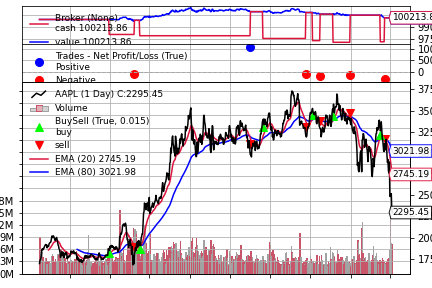

'AMZN-EMA_Cross_20_80.png'

AMZN-EMA_Cross_20_80.png


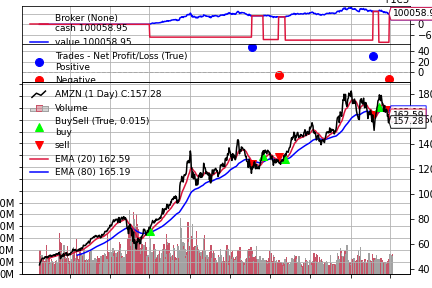

'AAPL-RSI_30-70_EMA_9.png'

AAPL-RSI_30-70_EMA_9.png


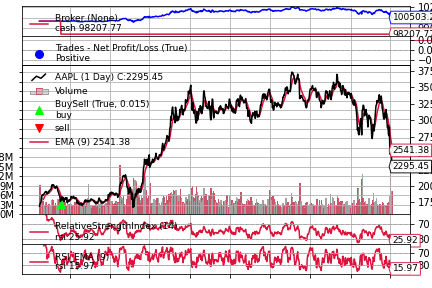

'AMZN-RSI_30-70_EMA_9.png'

AMZN-RSI_30-70_EMA_9.png


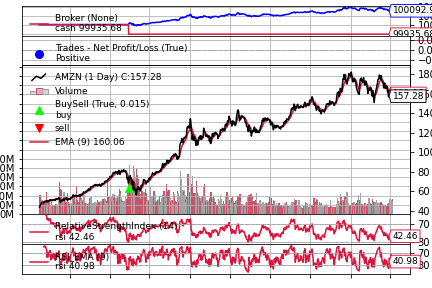

pnl  sharpe_ratio max_drawdown returns_ann  \
ticker strategy                                                         
AMZN   RSI_30-70_EMA_9   92.96      0.998564        3.14%     0.0929%   
       EMA_Cross_20_80   58.95      0.669760        3.74%     0.0589%   
AAPL   RSI_30-70_EMA_9  503.22      0.212526      140.86%     0.5020%   
       EMA_Cross_20_80  213.86      0.120906      126.71%     0.2136%   

                       buy_and_hold_return       vwr  
ticker strategy                                       
AMZN   RSI_30-70_EMA_9           258.2688%  0.018763  
       EMA_Cross_20_80           258.2688%  0.011981  
AAPL   RSI_30-70_EMA_9            30.4226%  0.082621  
       EMA_Cross_20_80            30.4226%  0.036235

In [15]:
print("We can use the StockManager to run any number of specific strategies")
to_plot = True
sm_td.run_strat(EMACrossoverStrategy, p1=20, p2=80, plot=to_plot)
sm_td.run_strat(RSIEMAStrategy, p1=9, p2=(30,70), plot=to_plot)

# Get the results from the strategies backtested with the StockManager
strat_perf = sm_td.get_results(to_print=True,ipython=True,graphs=to_plot)
display(strat_perf)

In [6]:
to_plot = True
# data = fetcher.get_hourly_price_history(datetime(2017, 6, 1))
# fetcher = TDDataFetcher(tickers)
# sm = StockDataManager.load_from_data_fetcher(fetcher, datetime(2019, 6, 1), interval='1d',debug=debug)
#     sm = StockDataManager.load_from_csv('data.csv', datetime(2019, 6, 1))
# display(sm._data.head())
sm.run_strat(EMACrossoverStrategy, p1=20, p2=80, plot=to_plot)
sm.run_strat(RSIEMAStrategy, p1=9, p2=(30,70), plot=to_plot)
strat_perf = sm.get_results(to_print=True,ipython=True,graphs=to_plot)
#     stocks = [Stock(t, strategy_perf=strat_perf.loc[t], fundamentals=fundamentals.loc[t], finviz=True) for t in sm.tickers]
strat_perf

[*********************100%***********************]  2 of 2 completed


AMZN                                                      \
                   Open         High          Low        Close    Adj Close   
Date                                                                          
2019-06-03  1760.010010  1766.290039  1672.000000  1692.689941  1692.689941   
2019-06-04  1699.239990  1730.819946  1680.890015  1729.560059  1729.560059   
2019-06-05  1749.599976  1752.000000  1715.250000  1738.500000  1738.500000   
2019-06-06  1737.709961  1760.000000  1726.130005  1754.359985  1754.359985   
2019-06-07  1763.699951  1806.250000  1759.489990  1804.030029  1804.030029   

                          AAPL                                              \
             Volume       Open       High        Low      Close  Adj Close   
Date                                                                         
2019-06-03  9098700  43.900002  44.480000  42.567501  43.325001  42.285900   
2019-06-04  5679100  43.860001  44.957500  43.630001  44.910000  43.832882   
2019-06-05  4239800  46.070000  46.247501  45.285000  45.634998  44.540489   
2019-06-06  3689300  45.770000  46.367500  45.537498  46.305000  45.194416   
2019-06-07  4808200  46.627499  47.980000  46.442501  47.537498  46.397362   

                       
               Volume  
Date                   
2019-06-03  161584400  
2019-06-04  123872000  
2019-06-05  119093600  
2019-06-06   90105200  
2019-06-07  122737600

,,pnl,sharpe_ratio,max_drawdown,returns_ann,buy_and_hold_return,vwr
ticker,strategy,,,,,,
AAPL,EMA_Cross_20_80,58.95,0.669760,3.74%,0.0589%,258.2688%,0.011981
AMZN,EMA_Cross_20_80,213.86,0.120904,126.71%,0.2136%,30.4226%,0.036234
AAPL,RSI_30-70_EMA_9,92.96,0.998564,3.14%,0.0929%,258.2688%,0.018763
AMZN,RSI_30-70_EMA_9,503.22,0.212526,140.86%,0.5020%,30.4226%,0.082621


pnl  sharpe_ratio max_drawdown returns_ann  \
ticker strategy                                                         
AAPL   RSI_30-70_EMA_9   92.96      0.998564        3.14%     0.0929%   
       EMA_Cross_20_80   58.95      0.669760        3.74%     0.0589%   
AMZN   RSI_30-70_EMA_9  503.22      0.212526      140.86%     0.5020%   
       EMA_Cross_20_80  213.86      0.120904      126.71%     0.2136%   

                       buy_and_hold_return       vwr  
ticker strategy                                       
AAPL   RSI_30-70_EMA_9           258.2688%  0.018763  
       EMA_Cross_20_80           258.2688%  0.011981  
AMZN   RSI_30-70_EMA_9            30.4226%  0.082621  
       EMA_Cross_20_80            30.4226%  0.036234

In [ ]:
# TODO learn about urox networking communication w timer & ulltra
# Create reference data --> security definitions, instrument / fundamentals definitions, previous prices, previous statsbook
# Create event drive MD price feed for getting live data updates
# C++ doe ...
        # Need to figure out how to pass timer context for tcp conns in c++ ?????
    
    
# APP: Need to make a python app for pulling reference data and publishing to kafka

/Users/jfeibs/Desktop/stockalyzer/stockalyzer/scripts/config/config.ini


,,pnl,sharpe_ratio,max_drawdown,returns_ann,buy_and_hold_return,vwr
ticker,strategy,,,,,,
NVDA,EMA_Cross_20_80,81.48,0.529803,5.07%,0.0814%,784.0889%,0.011110
AMD,EMA_Cross_20_80,86.00,0.271091,17.56%,0.0860%,461.2470%,0.011238
NVDA,RSI_30-70_EMA_9,41.39,0.467657,4.79%,0.0414%,784.0889%,0.005794
AMD,RSI_30-70_EMA_9,24.55,0.110866,10.23%,0.0245%,461.2470%,0.003446


'NVDA-EMA_Cross_20_80.png'

NVDA-EMA_Cross_20_80.png


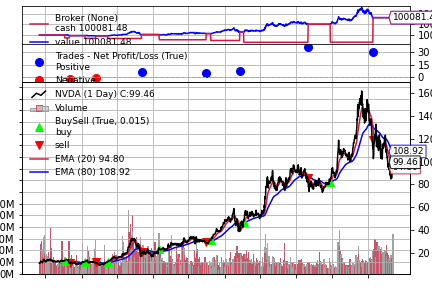

'AMD-EMA_Cross_20_80.png'

AMD-EMA_Cross_20_80.png


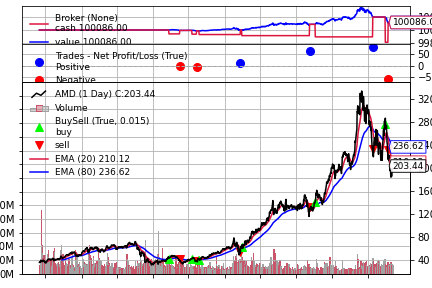

'NVDA-RSI_30-70_EMA_9.png'

NVDA-RSI_30-70_EMA_9.png


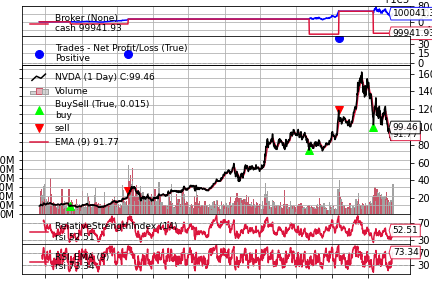

'AMD-RSI_30-70_EMA_9.png'

AMD-RSI_30-70_EMA_9.png


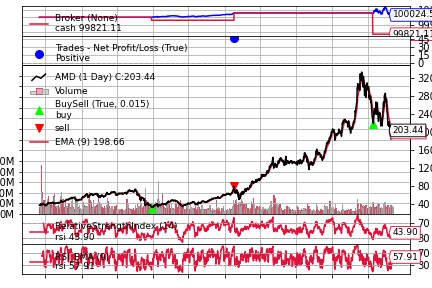

In [7]:
# %%time

def main(tickers=[], debug=False, to_plot=False, interval='1d'):
    fetcher = TDDataFetcher(tickers)
    fundamentals = fetcher.get_fundamentals()
    sm = StockDataManager.load_from_data_fetcher(fetcher, datetime(2017, 6, 1), debug=debug, interval=interval)
#     sm = StockDataManager.load_from_csv('data.csv', datetime(2019, 6, 1))
    sm.run_strat(EMACrossoverStrategy, p1=20, p2=80, plot=to_plot)
    sm.run_strat(RSIEMAStrategy, p1=9, p2=(30,70), plot=to_plot)
    strat_perf = sm.get_results(to_print=True,ipython=True,graphs=to_plot)
    stocks = [Stock(t, strategy_perf=strat_perf.loc[t], fundamentals=fundamentals.loc[t], finviz=True) for t in sm.tickers]
    return stocks, sm
# start = time.time()
tickers = ["NVDA", "AMD"]
stocks, sm = main(tickers=tickers, to_plot=True)
# end = time.time()
# print('{0:.4f} seconds'.format(end - start))

In [ ]:



# """YAHOO FINANCE"""
# import yfinance as yf
# # YAHOO FINANCEDATA
# tickers = ['AAPL','NVDA']
# yf_tickers = [yf.Ticker(t) for t in tickers]
# data = yf.download(tickers=tickers, start=datetime(2010, 6, 1), interval='1d', group_by = 'ticker')
# data['AAPL']

# TODO
## Cibelli:
- research successful strategy
## Me:
- Yahoo Fin Split & Adj Close data
- Hourly data
- Test capacity of algo to see how many tickers can run in time period (ideal 30 - 60 mins)
- Perf:
        - Time per trade
        - 

# TODO:
### - optstrategy --> more params, grid search
### Fix load_from_csv start_time param
## Data:
- Split & Dividend Data

# NEXT:
### - Screener Infrastructure / Stock Universe

# AI/ML:
### - create model to aggregate all info for a given stock, such as fundamentals, strategy performance, news...
### - create NN using ^features^ 

In [ ]:
def get_perf(results: List[List[bt.cerebro.OptReturn]])->pd.DataFrame:
    stats = []
    for i in results:
        for j in i:
            stats.append(
                {'strategy': f'SMA_Cross_{j.params.fast}_{j.params.slow}',
                 'sharpe_ratio': j.analyzers.sharperatio.get_analysis()['sharperatio'],
                 'return': '{0:.2f}%'.format(list(j.analyzers.timereturn.get_analysis().values())[0] * 100),
                 'buy_and_hold': '{0:.2f}%'.format(list(j.analyzers.buyandhold.get_analysis().values())[0] * 100),
                 'vwr': j.analyzers.vwr.get_analysis()['vwr'],
                }
            )
    df = pd.DataFrame(stats)
    df.sort_values(by='sharpe_ratio', ascending=False, inplace=True)
    df.set_index('strategy', inplace=True)
    return df

def grid_search(data_feed: bt.feeds.PandasData, fast: List[int], slow: List[int])->List[List[bt.cerebro.OptReturn]]:
    cerebro = bt.Cerebro()
    cerebro.optstrategy(EMACrossoverStrategy, fast=fast, slow=slow)
    cerebro.adddata(data_feed)

    cerebro.broker.setcash(10000.0)
    cerebro.broker.setcommission(commission=0.0004)  # Binance Swap taker fee

    cerebro.addsizer(bt.sizers.FixedSize, stake=1)

    # Add analyzers
    cerebro.addanalyzer(bt.analyzers.SharpeRatio, timeframe=bt.TimeFrame.Days, factor=365)
    cerebro.addanalyzer(bt.analyzers.VWR, timeframe=bt.TimeFrame.Days, tann=365)
    cerebro.addanalyzer(bt.analyzers.TimeReturn, timeframe=bt.TimeFrame.NoTimeFrame)
    cerebro.addanalyzer(bt.analyzers.TimeReturn, timeframe=bt.TimeFrame.NoTimeFrame, data=data_feed, _name='buyandhold')

    return cerebro.run()

# data_feed = bt.feeds.PandasData(dataname=sm._data.loc['PYPL'], timeframe=bt.TimeFrame.Days, openinterest=None)
# results = grid_search(data_feed, fast=[32, 64], slow=[256, 512])

In [ ]:
# # General STOCK SCREENER:
# output_file = "screener_results.csv"
# result = subprocess.run([sys.executable, "finviz_screener.py", "--table=Valuation",f"--output_name={output_file.split('.')[0]}", "--save=True"], capture_output=True, text=True)
# pd.read_csv(output_file)

In [4]:
import yfinance as yf
tickers = ['AAPL']#,'MSFT','AMZN','GOOG']

for t in tickers:
    data = yf.Ticker("AAPL")
    data.history(period='max')

In [8]:
data.splits

Date
1987-06-16    2.0
2000-06-21    2.0
2005-02-28    2.0
2014-06-09    7.0
2020-08-31    4.0
Name: Stock Splits, dtype: float64

In [9]:
data.actions

,Dividends,Stock Splits
Date,,
1987-05-11,0.000536,0.0
1987-06-16,0.000000,2.0
1987-08-10,0.000536,0.0
1987-11-17,0.000714,0.0
1988-02-12,0.000714,0.0
...,...,...
2021-05-07,0.220000,0.0
2021-08-06,0.220000,0.0
2021-11-05,0.220000,0.0


In [10]:
data.info

{'zip': '95014',
 'sector': 'Technology',
 'fullTimeEmployees': 154000,
 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. It also sells various related services. In addition, the company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; AirPods Max, an over-ear wireless headphone; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, HomePod, and iPod touch. Further, it provides AppleCare support services; cloud services store services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and podcasts. Additionally, the company offers various services, such as Apple Arcade, a game subscription service; Apple Music, which offers users a curated listening experience wit